## Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
from sklearn import preprocessing , metrics
from sklearn.metrics import  accuracy_score , recall_score , precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , export_graphviz

le = preprocessing.LabelEncoder()



## Applying Algo on Iris Dataset

Species mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


Accuracy: 0.9555555555555556
Precision: [1.         0.94444444 0.92307692]
Recall: [1.         0.94444444 0.92307692]
CCP Alphas: [0.         0.03090583 0.03090583 0.03148625 0.10851096 0.45284267
 0.92752659]
Impurities: [0.         0.03090583 0.06181167 0.09329792 0.20180888 0.65465155
 1.58217814]


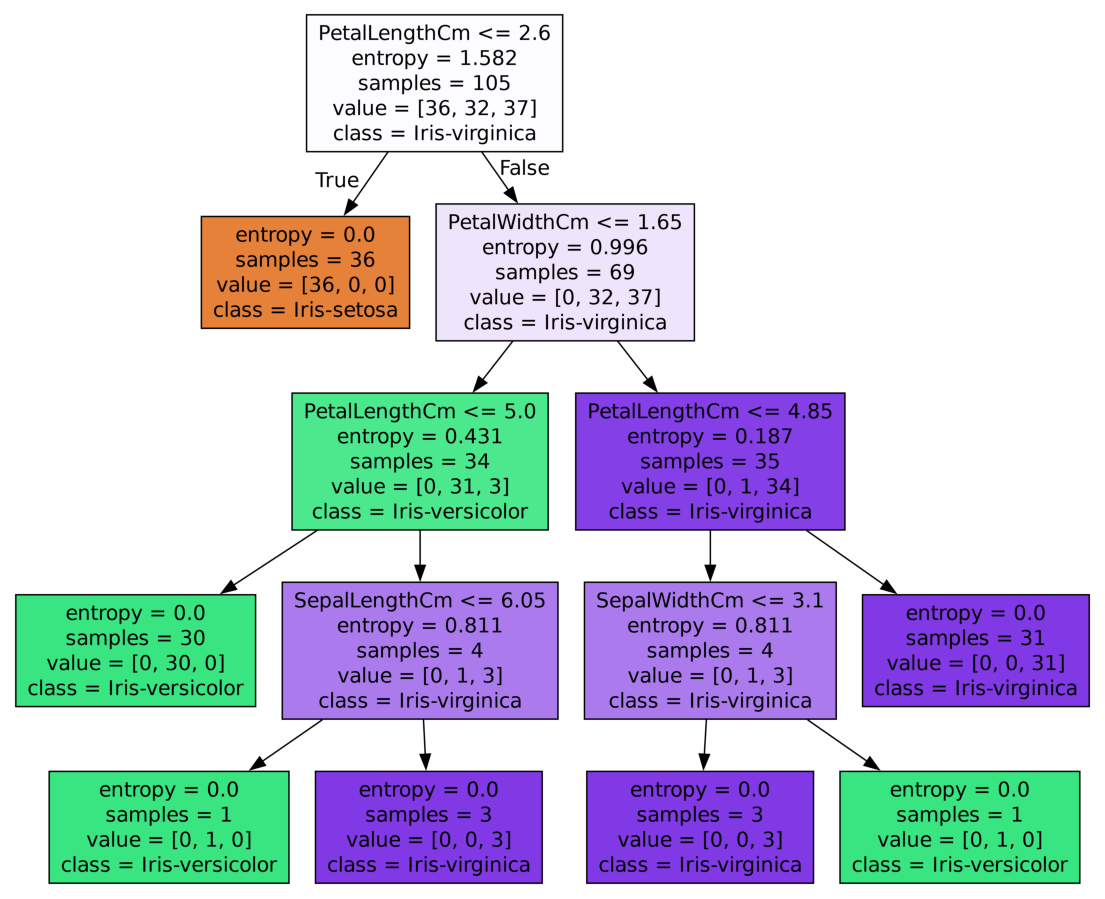

In [33]:
dataset = pd.read_csv('Iris.csv')
df  = pd.DataFrame(dataset)


# Encoding categorical data
species_encoded = le.fit_transform(df["Species"])
species_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Species mapping:", species_name_mapping)
print("\n")

# Separating features and class label
features = tuple(zip(df["SepalLengthCm"],df["SepalWidthCm"],df["PetalLengthCm"],df["PetalWidthCm"]))


# Splitting Training and Testing data
data_train , data_test , target_train , target_test = train_test_split(features, species_encoded, test_size = 0.3, random_state = 1)

# Train the Model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(data_train, target_train)



# Display the Decision Tree
export_graphviz(model, out_file='tree_iris.dot',
                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)

call(['dot', '-Tpng', 'tree_iris.dot', '-o', 'tree_iris.png', '-Gdpi=600'])

plt.figure(figsize=(14, 18))
plt.imshow(plt.imread('tree_iris.png'))
plt.axis('off')

# Calculating Accuracy , Precision and recall
target_pred = model.predict(data_test)
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))
precision = precision_score(target_test, target_pred, average=None)
recall = recall_score(target_test, target_pred, average=None)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))


path = model.cost_complexity_pruning_path(data_train, target_train)
ccp_alphas = path.ccp_alphas  # Array of CCP alphas
impurities = path.impurities  # Total impurity at each pruning step

# Print CCP Alpha and Impurity values
print("CCP Alphas:", ccp_alphas)
print("Impurities:", impurities)




# Task 1
## Applying Algo on Weather Dataset


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from subprocess import call
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('Weather.csv')

# Check for missing values or incorrect column names
print("Dataset Columns:", dataset.columns)
print(dataset.head())

# Encoding categorical data using OneHotEncoder
onehot = OneHotEncoder(sparse_output=False)
features = onehot.fit_transform(dataset[['Outlook', 'Temp', 'Humidity', 'Wind']])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(
    features,
    columns=onehot.get_feature_names_out(['Outlook', 'Temp', 'Humidity', 'Wind'])
)



# Split dataset into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    encoded_df, dataset['Play'], test_size=0.3, random_state=1
)

# Train the model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(features_train, target_train)


# Calculate accuracy, precision, and recall
target_pred = model.predict(features_test)
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))
precision = precision_score(target_test, target_pred, pos_label='Y')
recall = recall_score(target_test, target_pred, pos_label='Y')
print('Precision:', precision)
print('Recall:', recall)


Dataset Columns: Index(['Outlook', 'Temp', 'Humidity', 'Wind', 'Play'], dtype='object')
  Outlook Temp Humidity Wind Play
0       R    H   Normal    F    N
1       R    H     High    T    N
2       O    H   Normal    F    Y
3       S    M   Normal    F    Y
4       S    C   Normal    F    Y
Accuracy: 0.8
Precision: 1.0
Recall: 0.75


# Exercise 5.1

### (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
### (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

In [29]:
new_input_1 = pd.DataFrame(
    [[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]],
    columns=onehot.get_feature_names_out(['Outlook', 'Temp', 'Humidity', 'Wind'])
)

new_input_2 = pd.DataFrame(
    [[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]],
    columns=onehot.get_feature_names_out(['Outlook', 'Temp', 'Humidity', 'Wind'])
)

# Predict using the trained model
predicted_play_1 = model.predict(new_input_1)
predicted_play_2 = model.predict(new_input_2)

print("Predicted Play 1:", predicted_play_1[0])  # Output: 'Y' or 'N'
print("Predicted Play 2:", predicted_play_2[0])  # Output: 'Y' or 'N'

Predicted Play 1: N
Predicted Play 2: N


### (3) Plot the decision tree generated by the model for weather dataset. What were the values of criterion, max_depth during model generation.

Criterion used: entropy
Max Depth of the Tree: 3


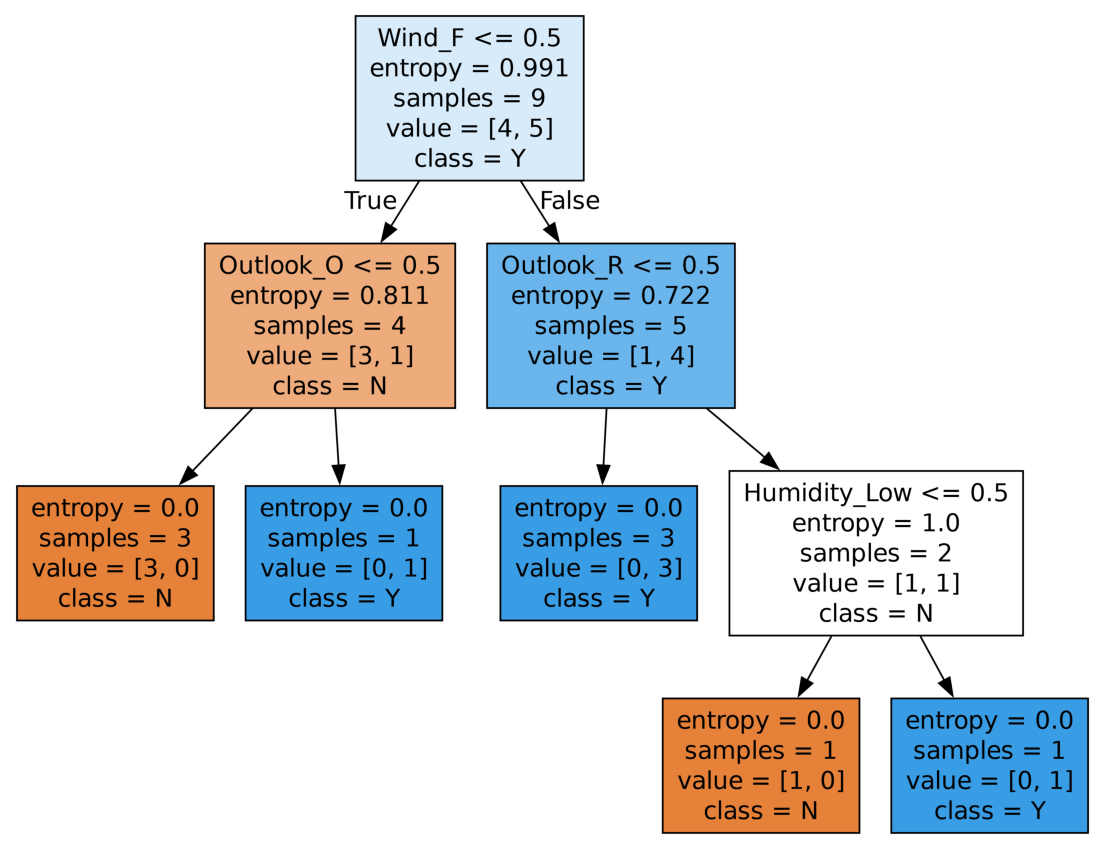

In [30]:
# Display the Decision Tree
export_graphviz(
    model,
    out_file='tree_weather.dot',
    feature_names=encoded_df.columns,  # Use encoded feature names
    class_names=['N', 'Y'],  # Target class names
    filled=True
)

# Get the criterion and max_depth values
print("Criterion used:", model.criterion)
print("Max Depth of the Tree:", model.get_depth())

# Convert .dot to .png using Graphviz
call(['dot', '-Tpng', 'tree_weather.dot', '-o', 'tree_weather.png', '-Gdpi=600'])

# Display the generated decision tree
plt.figure(figsize=(14, 18))
plt.imshow(plt.imread('tree_weather.png'))
plt.axis('off')
plt.show()

### (4) Accuracy , precision and recall of both Models?

### Ans ) Accuracy precision and recall are calculated in above code sections above

### (6) Train weather dataset using Decision Tree Classifier with max_depth of the tree =2. Find out accuracy, precision and recall of the trained model.

In [31]:
model_2 = DecisionTreeClassifier(criterion="entropy",max_depth=2)
model_2.fit(features_train, target_train)

target_pred_2 = model_2.predict(features_test)

print("Accuracy:", metrics.accuracy_score(target_test, target_pred_2))
precision = precision_score(target_test, target_pred_2, pos_label='Y')
recall = recall_score(target_test, target_pred_2, pos_label='Y')
print('Precision:', precision)
print('Recall:', recall)




Accuracy: 0.4
Precision: 0.6666666666666666
Recall: 0.5


# Task 2
## Applying Algo on wine Dataset

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Load Dataset
dataset_wine = load_wine()

features_wine = pd.DataFrame(dataset_wine.data, columns=dataset_wine.feature_names)
target_wine = pd.Series(dataset_wine.target, name="Target")

# Train-test split (80%-20%)
features_train_wine, features_test_wine, target_train_wine, target_test_wine = train_test_split(
    features_wine, target_wine, test_size=0.2, random_state=1
)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(features_train_wine, target_train_wine)

# Predict on test data
wine_pred = model.predict(features_test_wine)

# Evaluate the model
accuracy = accuracy_score(target_test_wine, wine_pred)
precision = precision_score(target_test_wine, wine_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(target_test_wine, wine_pred, average='weighted')        # Weighted for multiclass

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9722222222222222
Precision: 0.9742063492063492
Recall: 0.9722222222222222


### (7) Implement the Decision Tree classifier on Iris dataset and find the ccp_alpha values associated with the decision tree generated.
### Ans ) Calculated above on iris dataset section